In [3]:
# Python_version 2.7.15

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import os
import scipy.io
from scipy import stats
%matplotlib inline
import octopus as oct

In [4]:
filenames =['R24E09_ArcLight_SING_002_2020-01-28_14.24_Ftrace_mean',
            'R24E09_ArcLight_SING_004_2020-01-28_15.34_Ftrace_mean',
            'R24E09_ArcLight_SING_005_2020-01-29_12.53_Ftrace_mean',
            'R24E09_ArcLight_SING_004_2020-01-30_14.28_Ftrace_mean',
            'R24E09_ArcLight_SING_007_2020-01-30_15.13_Ftrace_mean',
            'R24E09_ArcLight_SING_009_2020-01-30_18.28_Ftrace_mean',
            'R24E09_ArcLight_SING_002_2020-01-31_13.39_Ftrace_mean',
            'R24E09_ArcLight_SING_001_2020-02-27_15.37_Ftrace_mean',
            'R24E09_ArcLight_SING_004_2020-08-06_16.28_Ftrace_mean',
            'R24E09_ArcLight_SING_001_2020-08-07_14.57_Ftrace_mean',
            'R24E09_ArcLight_SING_001_2020-08-12_12.29_Ftrace_mean',
            'R24E09_ArcLight_SING_007_2020-08-13_17.38_Ftrace_mean',
            'R24E09_ArcLight_SING_001_2020-08-17_15.21_Ftrace_mean',
            'R24E09_ArcLight_SING_004_2020-08-17_17.10_Ftrace_mean',
            'R24E09_ArcLight_SING_001_2020-08-18_12.25_Ftrace_mean']

In [5]:
# Import Data
time = np.load('time.npy')

for i in range(len(filenames)):
    a = np.load(filenames[i] + '.npy')
    if(i==0):
        Ftrace_all = a
    if(i==1):
        Ftrace_all = np.stack((Ftrace_all,a), axis=2)   
    if(i>1):
        a = a[:,:,np.newaxis]
        Ftrace_all = np.concatenate((Ftrace_all,a), axis=2)   

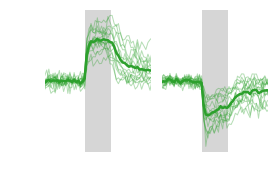

In [6]:
fig = plt.figure(figsize = (4, 2.6))

plt.subplots_adjust(wspace=0.1)

ax = fig.add_subplot(121)
plt.plot(time,Ftrace_all[:,6,:], color = 'C2', alpha = 0.35, linewidth = 1)
plt.plot(time,np.mean(Ftrace_all[:,6,:], axis=1), color = 'C2', linewidth = 2.5)
plt.axvspan(0, 1, facecolor='0.2', alpha=0.2)
plt.xlim([-1.5,2.5])
plt.ylim([-0.16,0.16])
plt.axis('off') 

ax = fig.add_subplot(122)
plt.plot(time,Ftrace_all[:,2,:], color = 'C2', alpha = 0.35, linewidth = 1)
plt.plot(time,np.mean(Ftrace_all[:,2,:], axis=1), color = 'C2', linewidth = 2.5)
plt.axvspan(0, 1, facecolor='0.2', alpha=0.2)
plt.xlim([-1.5,2.5])
plt.ylim([-0.16,0.16])
plt.axis('off')

bbox_inches = 'tight'
#plt.savefig('Fig1_R24E09_Ftraces.pdf',bbox_inches='tight', transparent=True, dpi=600)
plt.show()

In [7]:
rotations = [0,45,90,135,180,225,270,315,360]
Ftrace_mean = np.zeros([len(rotations),len(filenames)])
Ftrace_sem = np.zeros([len(rotations)])
for i in range(len(rotations)):
    Ftrace_sem[i] = stats.sem(np.mean(Ftrace_all[38:51,i,:],0))
    for j in range(len(filenames)):
        Ftrace_mean[i,j] = np.mean(Ftrace_all[np.int(np.where(time == 0)[0]):51,i,j])

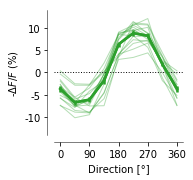

In [8]:
fig = plt.figure(figsize = (2.3, 2.3))

ax = fig.add_subplot(111) #PLOT directional tuning

ax.axhline(y=0,xmin=0.0001,xmax=0.9999, color='0.05', linestyle=':', linewidth = 1)
plt.plot(rotations, Ftrace_mean, color='C2', linewidth = 1, zorder = 0, alpha = 0.35)
plt.plot(rotations, np.mean(Ftrace_mean,1), linewidth = 2.5, color = 'C2')
plt.errorbar(rotations, np.mean(Ftrace_mean,1), yerr = Ftrace_sem, linewidth = 2.5, color = 'C2')


plt.xticks(rotations)
ax.set_xticklabels(rotations)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['left'].set_position(('outward', 7))
ax.spines['bottom'].set_position(('outward', 7))
for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(0.5)
ax.set_xlabel(u'Direction [°]', fontsize = 10)
ax.set_ylabel('-$\Delta F/F$ (%)', fontsize = 10)
yticks = np.array([-0.1,-0.05,0,0.05,0.1])
ax.set_yticks(yticks)
ax.set_yticklabels(('-10','-5','0','5','10'), size=10)
xticks = np.array([0,90,180,270,360])
ax.set_xticklabels(xticks, size=10)
ax.set_xticks(xticks)
plt.ylim([-0.14,0.14])

bbox_inches = 'tight'
#plt.savefig('Fig1_R24E09_DirTuning.pdf',bbox_inches='tight', transparent=True, dpi=600)

plt.show()

In [9]:
# Input to MOI function
rot_rad = np.radians(rotations[0:8])
radius = np.mean(Ftrace_mean[0:8,:],1)

In [10]:
MOI_flies = np.empty(len(Ftrace_mean[0,:]))
for i in range(len(Ftrace_mean[0,:])):
    MOI_flies[i] = oct.MOI(rot_rad, Ftrace_mean[0:8,i])

D_magn =0.14747146650092405   D_deg = 245.83255450361096
H_magn =0.0485664420045872   H_deg = 248.00681104367374
MOI = 0.3290906261519682
D_magn =0.22782514412120713   D_deg = 231.39585928416244
H_magn =0.15003048098997288   H_deg = 228.35813407483667
MOI = 0.6576081299263051
D_magn =0.08497971175356166   D_deg = 232.03213714602816
H_magn =0.20537886918599987   H_deg = 248.18041393764952
MOI = 0.39744522097192936
D_magn =0.24733234693476025   D_deg = 236.5674892621486
H_magn =0.22511099994869282   H_deg = 235.78586182020769
MOI = 0.91007123047475
D_magn =0.1767364771683282   D_deg = 245.62741051829374
H_magn =0.1814484669909651   H_deg = 255.0292820090213
MOI = 0.960946919281725
D_magn =0.12795333095555567   D_deg = 232.93591821886162
H_magn =0.2113503965042534   H_deg = 237.55383631608834
MOI = 0.6034432130338433
D_magn =0.23221011583158155   D_deg = 249.35723030442978
H_magn =0.168101432472577   H_deg = 268.8238787633275
MOI = 0.6825371101380773
D_magn =0.2283651330990831   D_deg = 2

In [11]:
LDir_flies = np.empty(len(Ftrace_mean[0,:]))
for i in range(len(Ftrace_mean[0,:])):
    LDir_flies[i] = oct.LDir(rot_rad, Ftrace_mean[0:8,i])

R_magn =0.19601160415660415   R_deg = 246.37115586576974
R_indiv_magn = 0.2565684184931398
LDir = 0.7639740124985225
R_magn =0.37772849503553335   R_deg = 230.18977729943848
R_indiv_magn = 0.49631221390389757
LDir = 0.7610703191533265
R_magn =0.2879772415198952   R_deg = 243.4727321309921
R_indiv_magn = 0.3967556550895859
LDir = 0.7258302126906573
R_magn =0.47243238082542427   R_deg = 236.1950577276256
R_indiv_magn = 0.6129877758302302
LDir = 0.7707044079069312
R_magn =0.3569802362449551   R_deg = 250.39032706778627
R_indiv_magn = 0.4708739906308943
LDir = 0.7581226471367847
R_magn =0.339044897950098   R_deg = 235.81268243356698
R_indiv_magn = 0.4719882689158863
LDir = 0.7183333152089839
R_magn =0.3946980248130172   R_deg = 257.517018064643
R_indiv_magn = 0.5203166331517525
LDir = 0.7585727606326625
R_magn =0.3664321435635305   R_deg = 233.5673887517002
R_indiv_magn = 0.4592906860239019
LDir = 0.797821847283141
R_magn =0.21281741782429633   R_deg = 241.91712486759909
R_indiv_magn = 0.2

In [12]:
R_deg_flies = np.empty(len(Ftrace_mean[0,:]))
for i in range(len(Ftrace_mean[0,:])):
    R_deg_flies[i] = oct.R_deg(rot_rad, Ftrace_mean[0:8,i])

In [14]:
# Save Ftrace as numpy array

np.save('R24E09_Ftrace_mean.npy', Ftrace_mean)
np.save('R24E09_Ftrace_all.npy', Ftrace_all)
np.save('R24E09_MOI.npy', MOI_flies)
np.save('R24E09_LDir.npy', LDir_flies)
np.save('R24E09_R_deg.npy', R_deg_flies)